<a href="https://colab.research.google.com/github/Nzaya/Mchezopesa-Ltd/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2019_06_Sharon_Nzaya_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # QUESTION
  
  
  You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

# METRICS OF SUCCESS

Optimal and reliable prediction Model:

Accuracy; 80% and above
With the least RMSE score achievable

# CONTEXT

The FIFA/Coca-Cola World Ranking is was developed by FIFA and named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

# EXPERIMENTAL DESIGN TAKEN

This project was carried out using the following procession:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question Expected flow for the assessment:
Perform your EDA
Perform any necessary feature engineering
Check of multicollinearity
Start building the model
Cross-validate the model
Compute RMSE
Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
Perform appropriate regressions on the data including your justification
Challenge your solution by providing insights on how you can make improvements.

# Importing necessary libraries

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.gridspec as gridspec
from numpy import random
import scipy.stats as scipy

from IPython.display import display

from sklearn.metrics import accuracy_score


# Loading our dataset

In [4]:
#Loading our ranking dataset

ranking=pd.read_csv('/content/fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# Renaming the rank_date column
#
ranking.rank_date = ranking.rename({'rank_date': 'date'}, axis = 1, inplace = True)

In [6]:
#Loading our results dataset

results=pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
# Making the date columns uniform
#
results.date = results.date.apply(lambda x: x.replace('/', '-'))
ranking.date = ranking.date.apply(lambda x: x.replace('/', '-'))

In [0]:
# Changing the date columns to datetime objects
#
ranking.date = pd.to_datetime(ranking.date)
results.date = pd.to_datetime(results.date)

# Creating a year and month column from the datetime object
#
ranking['year'] = ranking.date.dt.year
results['year'] = results.date.dt.year

ranking['month'] = ranking.date.dt.month
results['month'] = ranking.date.dt.month

In [9]:
# Checking the unique years in the ranking dataset
#
ranking.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [10]:
# Checking the unique years in the results dataset
#
results.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [11]:
#Merging the results dataframe to the ranking dataframe
# The dataframes have been merged on both year and month
#
merged= pd.merge(results, ranking, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])
merged.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [12]:
#Selecting the ranking details of the home team only
#
home_merged = merged[merged.home_team == merged.country_full]
#previewing the first five rows of the home_combined dataframe
#
home_merged.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18192,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18291,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18479,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18747,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18838,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,69.0,Thailand,THA,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1994-04-19


In [13]:
#Getting the columns to be renamed
#
home_merged.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [14]:
# Renaming the selected home_merged columns using a for loop
# 
for x, y in zip(home_merged.columns[11:-2], home_merged.columns[11:-2]):
  home_merged.rename(columns = {x: y + '_home'}, inplace = True)
  
# Previewing the renamed columns
home_merged.columns[11:-2]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home'],
      dtype='object')

In [15]:
# Selecting the ranking details of the away team only
#
away_merged = merged[merged.away_team == merged.country_full]
#previewing the first five rows of the away_combined dataframe
#
away_merged.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18224,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18286,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18532,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18648,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18774,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19


In [16]:
# Getting the columns to be renamed in the away_merged dataframe
#
away_merged.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [17]:
# Renaming the selected away_merged columns using a for loop
# 
for x, y in zip(away_merged.columns[11:-2], away_merged.columns[11:-2]):
  away_merged.rename(columns = {x: y + '_away'}, inplace = True)
  
# Previewing the renamed columns
away_merged.columns[11:-2]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['rank_away', 'country_full_away', 'country_abrv_away',
       'total_points_away', 'previous_points_away', 'rank_change_away',
       'cur_year_avg_away', 'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away'],
      dtype='object')

In [18]:
# Selecting only the relevant columns in the away_merged dataframe
# Creating a list of relevant columns
#
relevant_cols = list(away_merged.columns[9:-2])
relevant_cols.extend(['home_team', 'away_team'])

away_merged= away_merged[relevant_cols]

# Previewing the first two columns of the away_merged dataset
#
away_merged.head()

,year,month,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,home_team,away_team
18224,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barbados,Grenada
18286,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ghana,Egypt
18532,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mali,Burkina Faso
18648,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mauritania,Mali
18774,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thailand,Nigeria


In [19]:
#Merging the home_combined dataframe to the away_combined dataframe
# The two dataframes have been merged on year, month, home_team and away_team columns
#
final = pd.merge(home_merged, away_merged, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],\
                    right_on = ['year', 'month', 'home_team', 'away_team'])
# Previewing the first five rows of the merged dataframe
final.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,country_full_home,country_abrv_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,date_y,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Removing irrelevant columns from the final dataframe
# Creating a list of columns to be dropped
#
drop_cols = ['country_full_home', 'country_abrv_home', 'date_y', 'country_full_away',	'country_abrv_away']
final.drop(drop_cols, axis = 1, inplace = True)

In [21]:
# Checking for missing values
# This is because a left join was used and some countries in the result dataframe are not ranked.
#
final.isnull().sum()

date_x                             0
home_team                          0
away_team                          0
home_score                         0
away_score                         0
tournament                         0
city                               0
country                            0
neutral                            0
year                               0
month                              0
rank_home                          0
total_points_home                  0
previous_points_home               0
rank_change_home                   0
cur_year_avg_home                  0
cur_year_avg_weighted_home         0
last_year_avg_home                 0
last_year_avg_weighted_home        0
two_year_ago_avg_home              0
two_year_ago_weighted_home         0
three_year_ago_avg_home            0
three_year_ago_weighted_home       0
confederation                      0
rank_away                       1811
total_points_away               1811
previous_points_away            1811
r

In [0]:
# Dropping missing values
#
final.dropna(inplace=True)

In [0]:
# Creating a copy of the final_df for later usage
#
new= final.copy()

In [24]:
#Previewing the first five rows of the engineered dataframe
#
new.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EXPLORATORY DATA ANALYSIS

I am only going to use the information from Country, Rank, City, Home Team, Away Team, Home Score,Away Score, Confederation, Neutral and Tournament for the EDA.

This are the information which would be useful to understand the game.

In [25]:
new.shape

(18767, 36)

In [0]:
#creating a new column called results that is computed by the home score - the away score

new['result'] = new['home_score'] - new['away_score']
      

In [0]:
#creating a function for the win ,loss and draw

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

In [0]:
#Implementing and applying our function

new['results']=new.result.apply(lambda x: result(x))

In [29]:
new.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,results
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,win
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2,loss


# Univariate Analysis

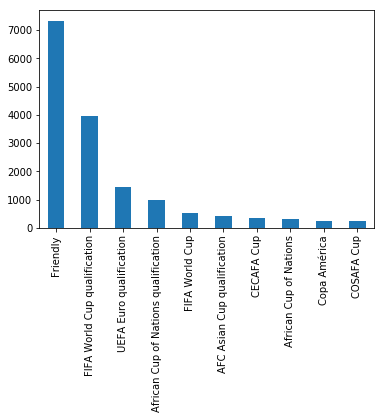

In [30]:
#Plotting a bar graph of tournament

new['tournament'].value_counts().head(10).plot.bar()

From the bar graph above we can see that majority of the games played were friendly

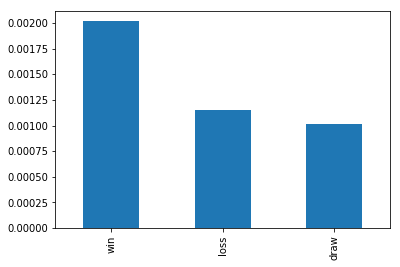

In [31]:
#Plotting a bar graph for the results

(new['results'].value_counts().head(10)/len(merged)).plot.bar()

From the bar graph above we can see that majority of the games were won 

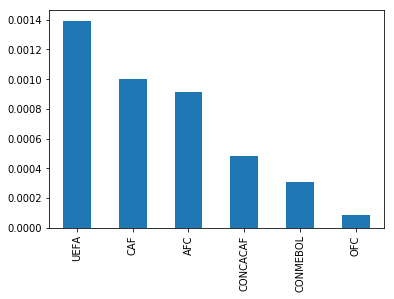

In [32]:
#plotting a bar graph for the confederation

(new['confederation'].value_counts().head(10)/len(merged)).plot.bar()

From the above we can see that UEFA organized majority of the matches while OFC organized the least

# LOGISTIC REGRESSION

I used different algorithms, Logistic regression and Random Forest, Gaussian NB and KNN to train the models and predict the outcome.
Then I defined a pipeline to optimize parameters of models 

In [33]:
#Previewing our dataset

new.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,results
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,win
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2,loss


In [0]:
new.drop(['date_x'],axis=1, inplace= True)

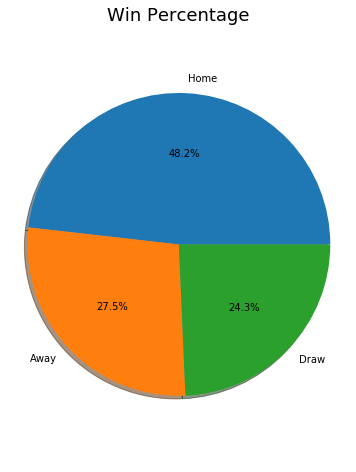

In [35]:
#Lets check the percantage of home win , away win and draw 

plt.figure(figsize=(6,8))
plt.pie(new['results'].value_counts(),labels=['Home','Away','Draw'], autopct='%1.1f%%',shadow=True, startangle=0)
plt.axis('equal')
plt.title('Win Percentage', size=18)
plt.show()

Making features for our model (As an obvious fact we do not know the results for the game that we are predicting! so we need to make some features based on the previous results for every match):

1)Taking the average of previous games different features for every team and considering as a new feature for our model (For example England played and scored, therefore we take this average (2 goals per game) and consider it as new feature)

2)I also defined a momentum which gives the average of five previous games for each team. It could be helpful to make our model more accurately. If for example some team in the five previous games shows poor results or great results, we can track them.

 We split the dataset into training(90%) and test (10%) sets. I use the test dataset only for the final prediction.

In [0]:

# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Selecting the relevant features for the logistic regression model
#
data = new[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'rank_home', 'rank_away', 'result']]

# Previewing the first five rows of the data
#
data.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_home,rank_away,result
0,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,0
1,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,0
2,Ghana,Egypt,2,1,Friendly,1994,29.0,24.0,1
3,Mali,Burkina Faso,1,1,Friendly,1994,48.0,101.0,0
4,Mauritania,Mali,1,3,Friendly,1994,147.0,48.0,-2


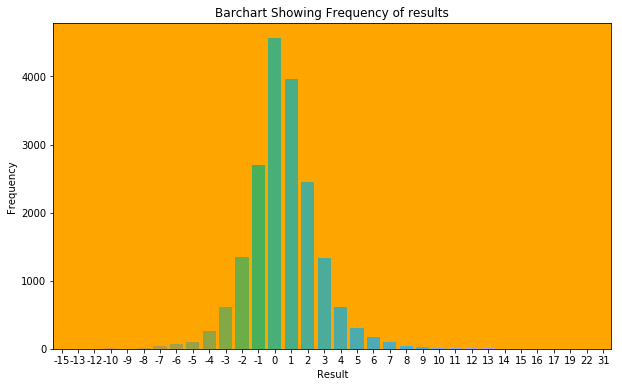

In [38]:
# Checking whether the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (10, 6))
ax = sns.countplot(data.result)
ax.set_facecolor('orange')
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Barchart Showing Frequency of results')
plt.show()

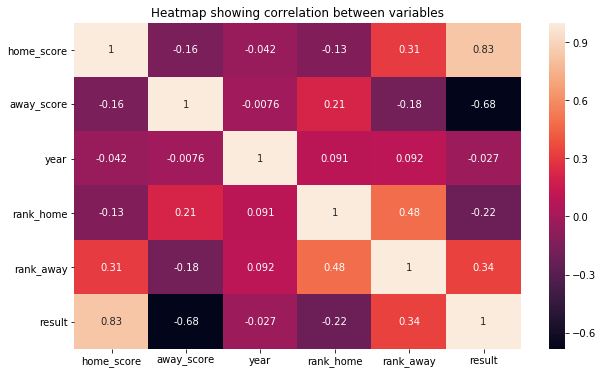

In [39]:
#Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

In [0]:

data['results']=data.result.apply(lambda x: result(x))

In [0]:
#Spliting the data into features and the target variable
#
X = data.drop(columns=['result', 'results', 'home_score', 'away_score', 'home_team',	'away_team'])
y = data.results

In [42]:
data.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_home,rank_away,result,results
0,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,0,draw
1,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,0,draw
2,Ghana,Egypt,2,1,Friendly,1994,29.0,24.0,1,win
3,Mali,Burkina Faso,1,1,Friendly,1994,48.0,101.0,0,draw
4,Mauritania,Mali,1,3,Friendly,1994,147.0,48.0,-2,loss


In [43]:
 #Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)
X.head()

,year,rank_home,rank_away,tournament_AFC Asian Cup,tournament_AFC Asian Cup qualification,tournament_AFC Challenge Cup,tournament_AFC Challenge Cup qualification,tournament_AFF Championship,tournament_African Cup of Nations,tournament_African Cup of Nations qualification,tournament_African Nations Championship,tournament_Amílcar Cabral Cup,tournament_Baltic Cup,tournament_CECAFA Cup,tournament_CFU Caribbean Cup,tournament_CFU Caribbean Cup qualification,tournament_COSAFA Cup,tournament_Confederations Cup,tournament_Copa América,tournament_Copa América qualification,tournament_Copa Paz del Chaco,tournament_Copa del Pacífico,tournament_Cyprus International Tournament,tournament_Dragon Cup,tournament_Dunhill Cup,tournament_Dynasty Cup,tournament_EAFF Championship,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_Gold Cup,tournament_Gold Cup qualification,tournament_Gulf Cup,tournament_Intercontinental Cup,tournament_King Hassan II Tournament,tournament_King's Cup,tournament_Kirin Cup,tournament_Korea Cup,tournament_Lunar New Year Cup,tournament_Malta International Tournament,tournament_Merdeka Tournament,tournament_Millennium Cup,tournament_Nations Cup,tournament_Nehru Cup,tournament_Nile Basin Tournament,tournament_Nordic Championship,tournament_OSN Cup,tournament_Oceania Nations Cup,tournament_Oceania Nations Cup qualification,tournament_Pacific Games,tournament_Prime Minister's Cup,tournament_SAFF Cup,tournament_SKN Football Festival,tournament_Simba Tournament,tournament_South Pacific Games,tournament_Tournoi de France,tournament_UAFA Cup,tournament_UAFA Cup qualification,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UEFA Nations League,tournament_UNCAF Cup,tournament_UNIFFAC Cup,tournament_USA Cup,tournament_United Arab Emirates Friendship Tournament,tournament_VFF Cup,tournament_WAFF Championship,tournament_Windward Islands Tournament
0,1994,99.0,131.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1994,99.0,131.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1994,29.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1994,48.0,101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1994,147.0,48.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)                                           

In [0]:
#import the class

from sklearn.linear_model import LogisticRegression

#instanstiate the model using default parameters

logreg= LogisticRegression()

In [0]:
#Fit the model with data

logreg.fit(X_train,y_train)

#
y_pred= logreg.predict(X_test)

# Confusion Matrix

This is used to evaluate the performance of our model

In [47]:
#import the metrics class
from sklearn import metrics

cnf_matrix= metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[   0,  356,  777],
       [   0,  717,  566],
       [   0,  295, 1981]])

# Visualizing Confusion matrix using Heat map

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 15.0, 'Predicted Label')

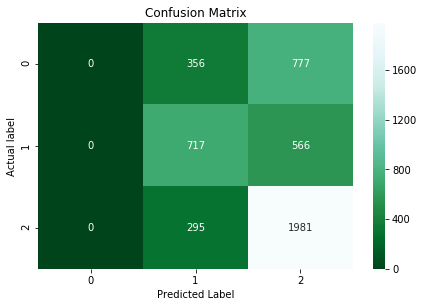

In [49]:

#Create Heatmap

#plt.figure(dpi=700,figsize=(10,10))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='BuGn_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')


# Confusion Matrix Evaluation Metrics

Lets evaluate the model using accuracy, precision and recall

In [50]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))
print("Precision", metrics.accuracy_score(y_test,y_pred))
print("Recall", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.5750213128729753
Precision 0.5750213128729753
Recall 0.5750213128729753


Precision is about being precise, how accurate your mode is in other word when your model makes a prediction how accurate is it

# CONCLUSION

Well, you got a classification rate of 57%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. 

Recall:The number of times our model can predict correctly

# POLYNOMIAL REGRESSION

In [51]:
#Checking for multicollinearity

correlations=data.corr()
correlations

,home_score,away_score,year,rank_home,rank_away,result
home_score,1.000000,-0.161261,-0.042178,-0.134452,0.314069,0.830230
away_score,-0.161261,1.000000,-0.007613,0.212876,-0.184720,-0.684010
year,-0.042178,-0.007613,1.000000,0.090749,0.092325,-0.026876
rank_home,-0.134452,0.212876,0.090749,1.000000,0.481618,-0.219615
rank_away,0.314069,-0.184720,0.092325,0.481618,1.000000,0.336476
result,0.830230,-0.684010,-0.026876,-0.219615,0.336476,1.000000


This shows how variables are related to one another

In [52]:
X=data['rank_home'].values.reshape(-1,1)
y=data['home_score'].values
print(X)
print(y)

[[99.]
 [99.]
 [29.]
 ...
 [15.]
 [84.]
 [24.]]
[0 0 2 ... 0 0 1]


# Visualizing in a Scatter plot

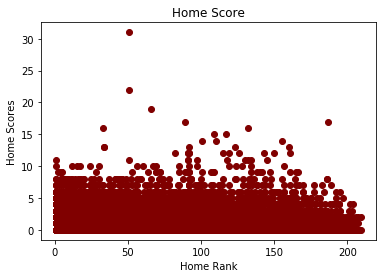

In [53]:
plt.scatter(X,y,color='maroon')
plt.title('Home Score')
plt.xlabel('Home Rank')
plt.ylabel('Home Scores')
plt.show()

In [0]:
#Polynomial Regression
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

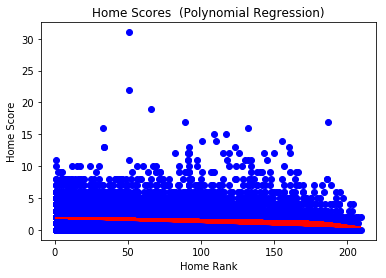

In [56]:
#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Scores  (Polynomial Regression)')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()


# CONCLUSION

The polynomial graph does not draw better result hence recommended to use any other type of regression or model as fit